# Predicting the price of used cars

In [44]:
#Importing Essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
import xgboost
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [45]:
# Importing dataset
df=pd.read_csv('car data.csv')

In [46]:
#Getting a glimpse of dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [48]:
# Adding a new column that shows how old the Vehicle is 

df['no_year']=2021-df['Year']

In [49]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [50]:
# Dropping the car name as it is not relevant

df.drop(['Car_Name','Year'],axis=1,inplace=True)

In [51]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [52]:
# Performing one hot encoding 
df=pd.get_dummies(df)

In [53]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,7,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,8,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,4,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,10,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,7,0,1,0,1,0,0,1


In [54]:
# Separating dependent and independent column

x=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [55]:
x.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,5.59,27000,0,7,0,0,1,1,0,0,1
1,9.54,43000,0,8,0,1,0,1,0,0,1
2,9.85,6900,0,4,0,0,1,1,0,0,1
3,4.15,5200,0,10,0,0,1,1,0,0,1
4,6.87,42450,0,7,0,1,0,1,0,0,1


In [56]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [57]:
# Splitting in test and train files

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=5)

In [58]:
x_train.shape , y_train.shape

((225, 11), (225,))

### Linear Regression

In [59]:
# Performing linear regression for prediction

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
prediction = lr.predict(x_test)

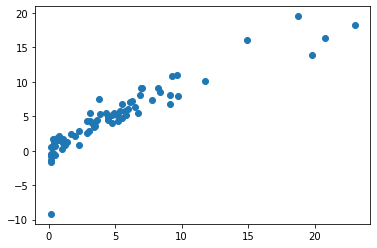

In [61]:
plt.scatter(y_test,prediction)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

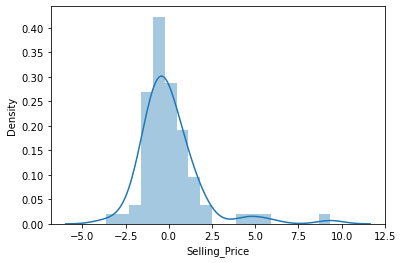

In [62]:
sns.distplot(y_test-prediction)

In [63]:
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  1.1409961087859033
MSE:  3.281596341657522
RMSE:  1.8115176901309913
R squared:  0.8608525898499435


### Ridge Regression

In [64]:
ridge=Ridge()
ridge.fit(x_train,y_train)
prediction = ridge.predict(x_test)

In [65]:
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  1.1332339163458574
MSE:  3.273826643652648
RMSE:  1.8093718920256963
R squared:  0.8611820433361331


### Lasso Regression

In [66]:
ridge=Lasso()
ridge.fit(x_train,y_train)
prediction = ridge.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  1.3349151159008388
MSE:  4.473136814451777
RMSE:  2.114979152249917
R squared:  0.8103284687770422


In [67]:
r=Ridge()
parameters={'alpha':[1,20]}
l=RandomizedSearchCV(r,parameters,scoring="neg_mean_squared_error",cv=5)
l.fit(x_train,y_train)
prediction = l.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  1.1187640189415795
MSE:  3.2349381933942634
RMSE:  1.7985933930141809
R squared:  0.8628310051750747


D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [68]:
r=Ridge()
parameters={'alpha':[1000,100,30,40,50]}
l=GridSearchCV(r,parameters,scoring="neg_mean_squared_error",cv=5)
l.fit(x_train,y_train)
prediction = l.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  1.1194605545945522
MSE:  3.2351172727768716
RMSE:  1.798643175501153
R squared:  0.8628234117876782


In [69]:
l.best_params_

{'alpha': 30}

### Random Forest 

In [70]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [71]:
r=RandomForestRegressor(n_estimators=100)
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train,y_train)
prediction = rf_random.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   56.8s finished


MAE:  0.5705290614035124
MSE:  1.0597373647440875
RMSE:  1.0294354592416601
R squared:  0.9550646409884452


In [72]:
r=RandomForestRegressor(n_estimators=100)

r.fit(x_train,y_train)
prediction = r.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  0.4956236842105269
MSE:  0.6005235668421056
RMSE:  0.7749345564898403
R squared:  0.9745363870627833


### XGBoost

In [73]:
regressor_xgb= xgboost.XGBRegressor()

In [74]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [75]:
xgb_random=RandomizedSearchCV(regressor_xgb,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [76]:
xgb_random.fit(x_train, y_train)
prediction_xgb = xgb_random.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction_xgb))
print('MSE: ',metrics.mean_squared_error(y_test,prediction_xgb))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction_xgb)))
print('R squared: ',metrics.r2_score(y_test,prediction_xgb))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    0.4s remaining:    0.0s


MAE:  1.3217691253204094
MSE:  9.94211093331879
RMSE:  3.153111310010922
R squared:  0.5784310915287311


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.5s finished


In [77]:

xgb_random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
xgb_random.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [79]:
regressor_xgb=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=8,
             min_child_weight=3, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Saving model in pickel file 

In [80]:
import pickle 
pickle.dump(r,open('model.pkl','wb'))